<a href="https://colab.research.google.com/github/vikkimaps/GreenAWARE/blob/main/GISRUK_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#start by installing the new packages
!pip install palettable
!pip install descartes
!pip install pysal
!pip install matplotlib_scalebar

import pandas as pd
import numba
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import palettable as pltt
import descartes
from pysal.viz import mapclassify
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from matplotlib_scalebar.scalebar import ScaleBar
import folium
import mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 8.4 MB/s eta 0:00:00


In [3]:
GA = gpd.read_file('GA_Survey_LSOA.shp')

<Axes: >

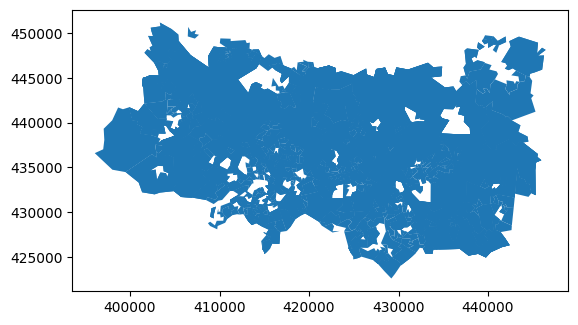

In [6]:
GA.plot()

In [7]:
GA.head()

,ResponseId,City,LSOA21CD,LSOA21NM,VisitFrequ,YourPark,YourParkNe,Park_Large,Park_EasyD,Park_PathL,...,GardenAcce,Wellbeing,ruc21,imd,TotalBarri,ParkArea_m,EucDistanc,NetworkWal,AdjustedWa,geometry
0,R_11pN42BqFMon1Dg,Bradford,E01033690,Bradford 065C,None,Centenary Square,1,2,2,2,...,None,None,UN1,6594,None,818.778,100.698757111865,91.5735064217925,1.09,"POLYGON ((416703.308 432722.906, 416311.351 43..."
1,R_12Pk20L0GuvGUKT,Leeds,E01035044,Leeds 063F,1,Woodhouse Moor,1,2,2,2,...,1,None,UN1,15095,9,191761.413924764,369.984,125.841305871963,1.48,"POLYGON ((429647.001 434870, 429455.381 434406..."
2,R_137Fcmljqx3CP7M,Leeds,E01011653,Leeds 020C,1,Roundhay Park,1,1,1,1,...,1,24,UN1,26196,8,1478719.71360927,1037.464,1368.31825017457,19.58,"POLYGON ((432729.133 438407.817, 432506.25 438..."
3,R_13dkNNTCOQTNxm8,Leeds,E01011568,Leeds 015E,1,Wigton Moor,1,2,1,1,...,1,21,UN1,29016,3,35310.741,612.869449019468,985.018156397393,13.24,"POLYGON ((432270.817 439807.415, 431826.599 43..."
4,R_1Cvh0VGrPA3V18A,Leeds,E01032489,Leeds 102F,1,Scatcherd Park,1,4,2,2,...,3,21,UN1,10507,8,43286.5196234574,380.573,395.97268575017,5.16,"POLYGON ((427573.909 428023.096, 426585.071 42..."


In [12]:
GA.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Columns: 148 entries, ResponseId to geometry
dtypes: geometry(1), int64(2), object(145)
memory usage: 3.0+ MB


In [23]:
GA['LSOA21CD'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2676 entries, 0 to 2675
Series name: LSOA21CD
Non-Null Count  Dtype 
--------------  ----- 
2676 non-null   object
dtypes: object(1)
memory usage: 21.0+ KB


In [28]:
GA['TotalBarri'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2676 entries, 0 to 2675
Series name: TotalBarri
Non-Null Count  Dtype  
--------------  -----  
2430 non-null   float64
dtypes: float64(1)
memory usage: 21.0 KB


In [27]:
GA['TotalBarri'] = pd.to_numeric(GA['TotalBarri'])

In [32]:
Avg_Barriers = GA.groupby('LSOA21NM')['TotalBarri'].mean()
Avg_Barriers

,TotalBarri
LSOA21NM,
Bradford 001C,11.00
Bradford 001D,3.75
Bradford 002A,3.75
Bradford 002B,1.00
Bradford 002C,8.00
...,...
Wakefield 008C,3.00
Wakefield 010D,6.00
Wakefield 014D,4.00


In [33]:
Avg_Barriers.to_csv('GA_AvgBarriers.csv', index=True)

<Axes: xlabel='TotalBarri', ylabel='Count'>

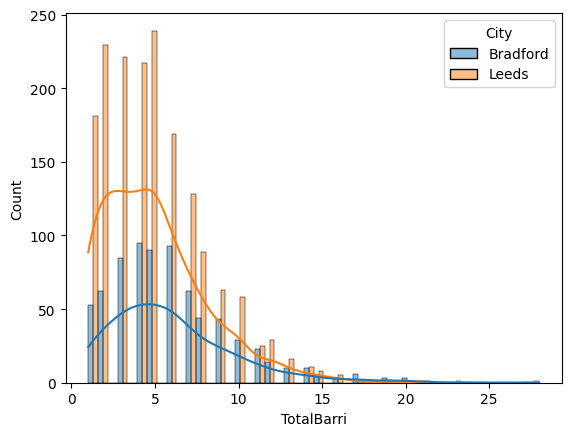

In [35]:
sns.histplot(GA, x = "TotalBarri", hue = 'City',multiple ='dodge', kde = True)

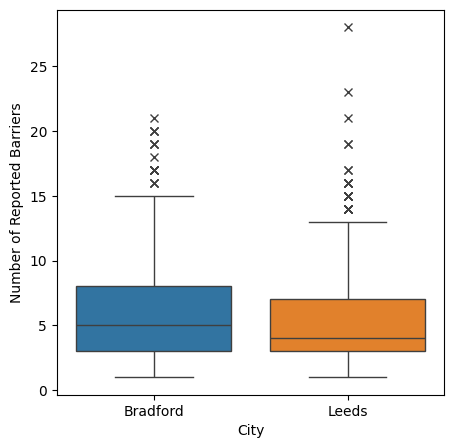

In [41]:
fig, ax = plt.subplots(figsize=(5, 5)) #change the figure size
sns.boxplot(data = GA, y = "TotalBarri", x = "City",   flierprops={"marker":"x"}, hue = 'City')
plt.ylabel("Number of Reported Barriers")
plt.show()

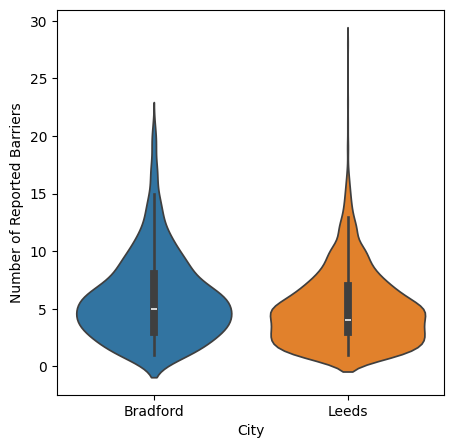

In [43]:
fig, ax = plt.subplots(figsize=(5, 5)) #change the figure size
sns.violinplot(data = GA, y = "TotalBarri", x = "City", hue = 'City')
plt.ylabel("Number of Reported Barriers")
plt.show()

In [69]:
GA.info('verbose')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 148 columns):
 #    Column      Dtype   
---   ------      -----   
 0    ResponseId  object  
 1    City        object  
 2    LSOA21CD    object  
 3    LSOA21NM    object  
 4    VisitFrequ  object  
 5    YourPark    object  
 6    YourParkNe  object  
 7    Park_Large  object  
 8    Park_EasyD  object  
 9    Park_PathL  object  
 10   Park_Appea  object  
 11   Park_Facil  object  
 12   Park_App_1  object  
 13   Park_Affor  object  
 14   Park_Clean  object  
 15   Park_SafeD  object  
 16   Park_SafeA  object  
 17   Park_Welco  object  
 18   Park_Satis  object  
 19   ParkVisita  object  
 20   ParkVisi_1  object  
 21   VisitLengt  object  
 22   ParkAvoida  object  
 23   Reason_Rel  object  
 24   Reason_Fre  object  
 25   Reason_Rid  object  
 26   Reason_Spo  object  
 27   Reason_Out  object  
 28   Reason_Pic  object  
 29   Reason_Caf  object  
 30   Reason_Use  ob

<Axes: xlabel='TotalBarri', ylabel='Count'>

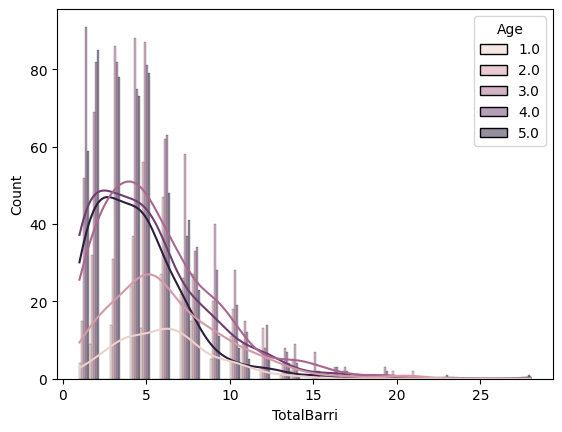

In [49]:
sns.histplot(GA, x = "TotalBarri", hue = 'Age',multiple ='dodge', kde = True)

In [72]:
GA['Gender'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

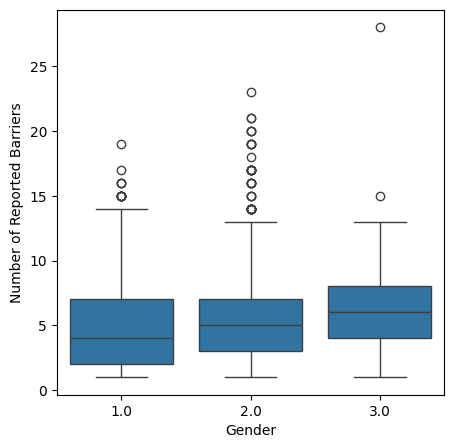

In [54]:
fig, ax = plt.subplots(figsize=(5, 5)) #change the figure size
sns.boxplot(data = GA, y = "TotalBarri", x = "Gender")
plt.ylabel("Number of Reported Barriers")
plt.show()

In [55]:
GA['LongTermHe'] = pd.to_numeric(GA['LongTermHe'])

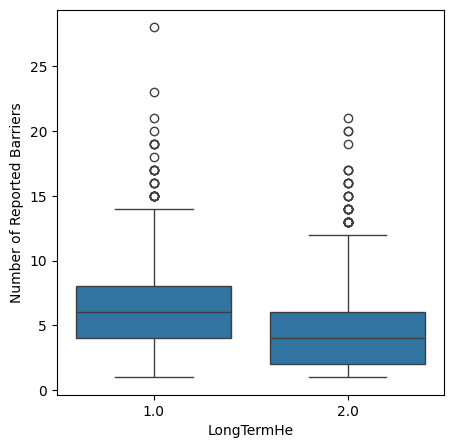

In [56]:
fig, ax = plt.subplots(figsize=(5, 5)) #change the figure size
sns.boxplot(data = GA, y = "TotalBarri", x = "LongTermHe")
plt.ylabel("Number of Reported Barriers")
plt.show()

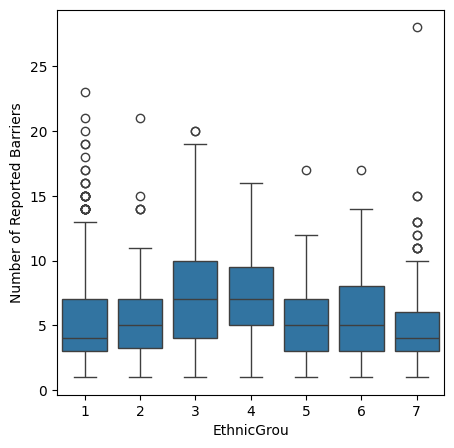

In [58]:
fig, ax = plt.subplots(figsize=(5, 5)) #change the figure size
sns.boxplot(data = GA, y = "TotalBarri", x = "EthnicGrou")
plt.ylabel("Number of Reported Barriers")
plt.show()

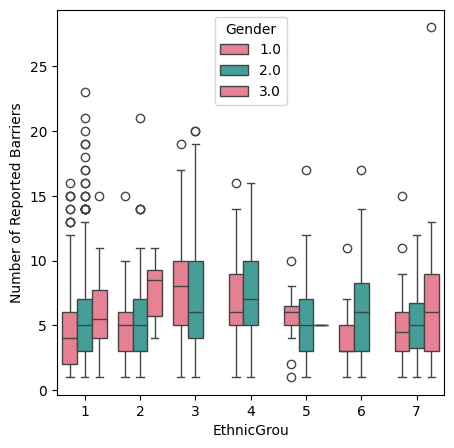

In [84]:
fig, ax = plt.subplots(figsize=(5, 5)) #change the figure size
sns.boxplot(data = GA, y = "TotalBarri", x = "EthnicGrou", hue = "Gender", palette = "husl" )
plt.ylabel("Number of Reported Barriers")
plt.show()

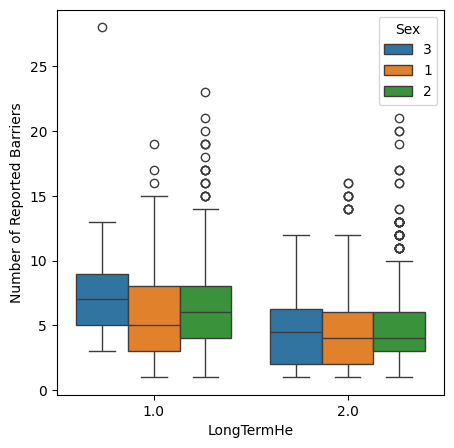

In [63]:
fig, ax = plt.subplots(figsize=(5, 5)) #change the figure size
sns.boxplot(data = GA, y = "TotalBarri", x = "LongTermHe", hue = "Sex" )
plt.ylabel("Number of Reported Barriers")
plt.show()